# Измерение времени расчета коэффициентов
Измеряются времена расчетов коэффициентов для разных методов. Интерполируются данные погоды (среднесуточная температура) за 3, 6, 9, 12 мес.  
Коэффициенты кубического сплайна и кривой Безье рассчитываются с использованием метода прогонки, а В-сплайна - методом LU разложения.
Таким образом, время от количества узлов будет зависеть линейно для кубического сплайна и кривой Безье и кубически - для В-сплайна.

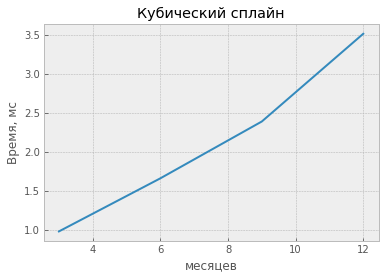

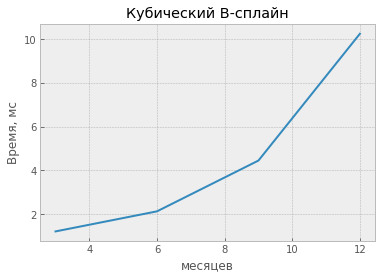

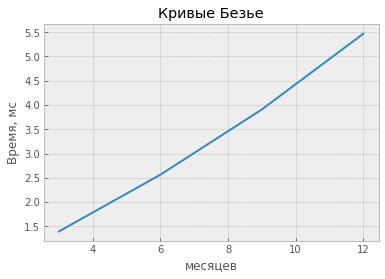

In [8]:
%matplotlib inline

from matplotlib import style
import matplotlib.pyplot as plt
import numpy as np
import csv
import time
from ..interp.spline import Spline
from ..interp.bspline import CubicBSpline
from ..interp.bezier import Bezier

style.use('bmh')

filenames = ('data/p3m.txt', 'data/p6m.txt', 'data/p9m.txt', 'data/p12m.txt',)
knots = {'3m' : [], '6m' : [], '9m' : [], '12m' : []}
values = {'3m' : [], '6m' : [], '9m' : [], '12m' : []}
methods = {'Spline': {}, 'BSpline' : {}, 'Bezier' : {}}
with open(filenames[0]) as file1, open(filenames[1]) as file2, open(filenames[2]) as file3, open(filenames[3]) as file4:
    reader = csv.DictReader(file1, delimiter=' ', fieldnames=('knot', 'value'))
    for row in reader:
        knots['3m'].append(float(row['knot']))
        values['3m'].append(float(row['value']))
    
    reader = csv.DictReader(file2, delimiter=' ', fieldnames=('knot', 'value'))
    for row in reader:
        knots['6m'].append(float(row['knot']))
        values['6m'].append(float(row['value']))
    
    reader = csv.DictReader(file3, delimiter=' ', fieldnames=('knot', 'value'))
    for row in reader:
        knots['9m'].append(float(row['knot']))
        values['9m'].append(float(row['value']))
    
    reader = csv.DictReader(file4, delimiter=' ', fieldnames=('knot', 'value'))
    for row in reader:
        knots['12m'].append(float(row['knot']))
        values['12m'].append(float(row['value']))

for key in knots.keys():
    start_time = time.perf_counter()
    spl = Spline().fit(knots[key], values[key], 0.0, 0.0)
    end_time = time.perf_counter()
    methods['Spline'][key] = (end_time - start_time) * 1000
    
for key in knots.keys():
    start_time = time.perf_counter()
    spl = CubicBSpline().fit(knots[key], values[key], 0.0, 0.0)
    end_time = time.perf_counter()
    methods['BSpline'][key] = (end_time - start_time) * 1000

for key in knots.keys():
    start_time = time.perf_counter()
    spl = Bezier().fit(knots[key], values[key], 0.0, 0.0)
    end_time = time.perf_counter()
    methods['Bezier'][key] = (end_time - start_time) * 1000

plt.title("Кубический сплайн")
plt.ylabel('Время, мс')
plt.xlabel('месяцев')
plt.plot([3, 6, 9, 12], methods['Spline'].values())
plt.show()

plt.title("Кубический B-сплайн")
plt.ylabel('Время, мс')
plt.xlabel('месяцев')
plt.plot([3, 6, 9, 12], methods['BSpline'].values())
plt.show()

plt.title("Кривые Безье")
plt.ylabel('Время, мс')
plt.xlabel('месяцев')
plt.plot([3, 6, 9, 12], methods['Bezier'].values())
plt.show()